## Лабораторная работа 2. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

###  Правила сдачи

Работу необходимо сдавать в систему Anytask (более подробную информацию можно найти на странице курса). 

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели или максимальная глубина решающего дерева). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH) . Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

### Задание

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k.
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [1]:
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_select
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('data.adult.csv')
print(df.shape)
df.head()

(16280, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(1 балл) Задание 1.** Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Сохраните целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Сохраните их отдельно.

**Удаление обьектов с пропущенными значениями **

In [4]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df = df[~np.isnan(df[col])]
    else:
        df = df[df[col] != '?']

print(df.shape)
df.head()

(15347, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


**Отделение целевой переменной от датасета и выделение численных признаков**

In [5]:
y_df = df['>50K,<=50K'].map(lambda x: 0 if x == '<=50K' else 1)
X_df = df.drop(['>50K,<=50K'], axis=1)

In [6]:
X_df_numerical = pd.DataFrame()
X_df_categoracal = pd.DataFrame()

for col in X_df.columns:
    if df[col].dtype == 'int64':
        X_df_numerical[col] = X_df[col]
    else:
        X_df_categoracal[col] = X_df[col]

In [7]:
X_df_numerical.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


### (7 баллов) Обучение классификаторов на вещественных признаках

В данном разделе будет необходимо работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)



**(1.5 балла) Задание 2.** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [8]:
def plots_scores(result_score, title):
    params_name = list(result_score['params'][0].keys())[0]
    params_values = list(map(lambda x: x[params_name], result_score['params']))
    title = "Score for algorithm " + title
    
    means_scopes_train = result_score['mean_train_score']
    std_scopes_train = result_score['std_train_score']

    means_scopes_test = result_score['mean_test_score']
    std_scopes_test = result_score['std_test_score']
    
    fig = plt.figure(figsize=(25,8))
    ax = fig.add_subplot(121)

    ax.set_title(title)

    ax.set_xlabel(params_name)
    ax.set_ylabel("Score")

    ax.fill_between(params_values,
                     means_scopes_train - std_scopes_train,
                     means_scopes_train + std_scopes_train,
                     alpha=0.1, color="r")

    ax.fill_between(params_values,
                     means_scopes_test - std_scopes_test,
                     means_scopes_test + std_scopes_test,
                     alpha=0.1, color="g")

    ax.plot(params_values,
             means_scopes_train,
             'o-', color="r",
             label="Training score")

    ax.plot(params_values,
             means_scopes_test,
             'o-', color="g",
             label="Cross-validation score")

    ax.legend(loc="best")
    ax = fig.add_subplot(122)

    ax.set_title(title)

    ax.set_xlabel(params_name)
    ax.set_ylabel("Score")

    ax.errorbar(params_values, means_scopes_test, yerr=std_scopes_test, linestyle='', fmt='o')

### kNN


In [9]:
parameters = {'n_neighbors': np.linspace(1, 30, 15, dtype=np.int64)}
clf = model_select.GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical, y_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30],
      dtype=int64)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Лучший подбор параметра для KNN: {'n_neighbors': 5}
Лучший scope для KNN: 0.6404389334795216
Макимальное отклонение для KNN: 0.013692361993231674


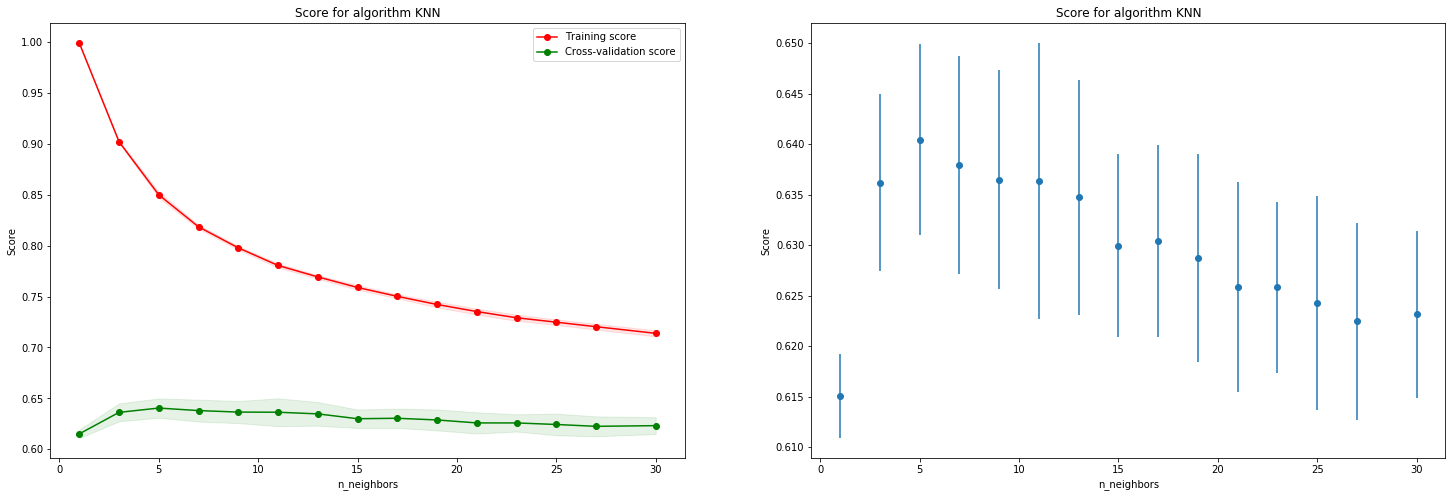

In [10]:
plots_scores(clf.cv_results_, "KNN")
print("Лучший подбор параметра для KNN: {}".format(clf.best_params_))
print("Лучший scope для KNN: {}".format(clf.best_score_))
print("Макимальное отклонение для KNN: {}".format(max(clf.cv_results_['std_test_score'])))

### Decision Tree

In [11]:
parameters = {'max_depth': np.linspace(1, 20, 15, dtype=np.int64)}
clf = model_select.GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical, y_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 13, 14, 15, 17, 18, 20],
      dtype=int64)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Лучший подбор параметра для DTree: {'max_depth': 7}
Лучший scope для DTree: 0.8413570823022917
Макимальное отклонение для DTree: 0.007544571870018204


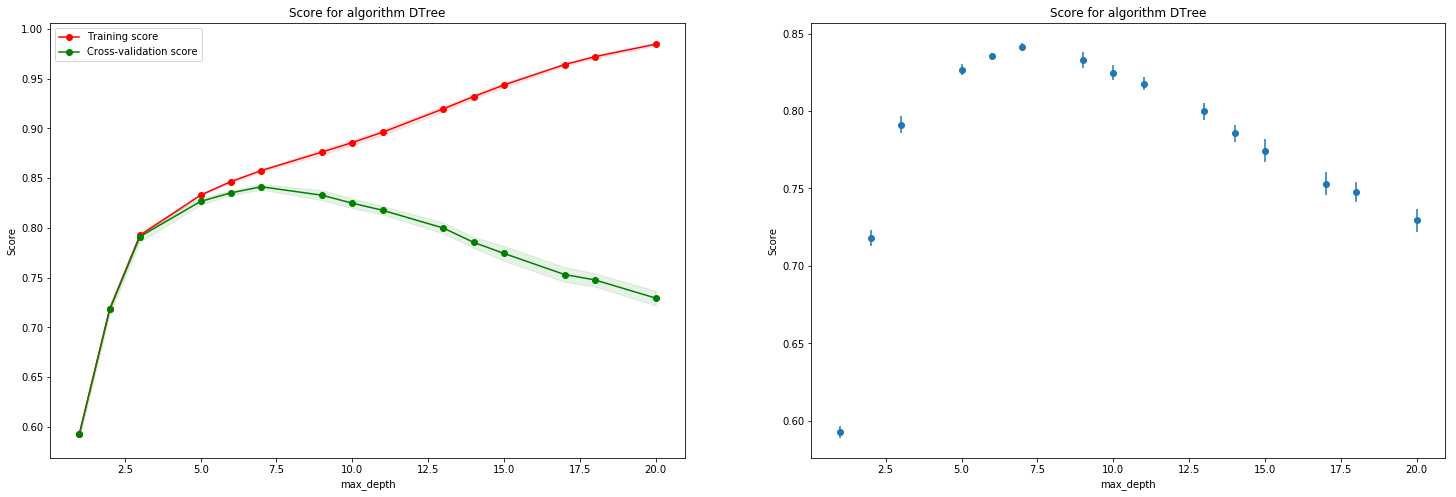

In [12]:
plots_scores(clf.cv_results_, "DTree")
print("Лучший подбор параметра для DTree: {}".format(clf.best_params_))
print("Лучший scope для DTree: {}".format(clf.best_score_))
print("Макимальное отклонение для DTree: {}".format(max(clf.cv_results_['std_test_score'])))

### SGD Linear Classifier

In [13]:
parameters = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
clf = model_select.GridSearchCV(SGDClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical, y_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Лучший подбор параметра для SGD Linear Classifier: {'loss': 'modified_huber'}
Лучший scope для SGD Linear Classifier: 0.6090741346128562
Макимальное отклонение для SGD Linear Classifier: 0.031600955623410226


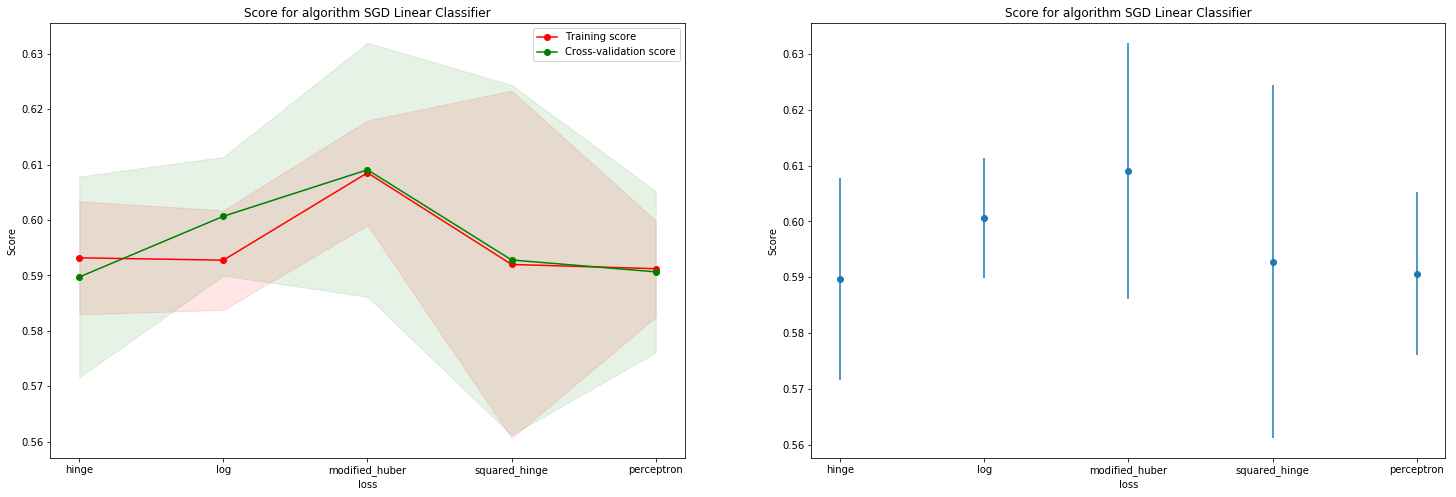

In [14]:
plots_scores(clf.cv_results_, "SGD Linear Classifier")
print("Лучший подбор параметра для SGD Linear Classifier: {}".format(clf.best_params_))
print("Лучший scope для SGD Linear Classifier: {}".format(clf.best_score_))
print("Макимальное отклонение для SGD Linear Classifier: {}".format(max(clf.cv_results_['std_test_score'])))

### Random Forest

**(0.5 балл) Задание 3.** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев: обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

*Функция для вычисления scope для каждого дерева в лесе и подсчет голосования.*

In [15]:
def ScopeForest(clf, X, y):
    predictions = []
    scores = []
    for tree in clf.estimators_:
        predict = tree.predict(X)
        predictions.append(predict)
        forest_predict = np.mean(predictions, axis=0)
        scores.append(roc_auc_score(y, forest_predict))
    return scores

In [16]:
X = X_df_numerical.values
y = y_df.values
MAX_ESTIMATION = 1000

*Разбиваем выборку на 5 частей и делаем тоже, что и раньше*

In [17]:
clf = RandomForestClassifier(n_estimators=MAX_ESTIMATION, random_state=42)
kf = model_select.KFold(n_splits=5, random_state=32, shuffle=False)
training_scope = []
testing_scope = []
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    training_scope.append(ScopeForest(clf, X_train, y_train))
    testing_scope.append(ScopeForest(clf, X_test, y_test))

TRAIN: [ 3070  3071  3072 ... 15344 15345 15346] TEST: [   0    1    2 ... 3067 3068 3069]
TRAIN: [    0     1     2 ... 15344 15345 15346] TEST: [3070 3071 3072 ... 6137 6138 6139]
TRAIN: [    0     1     2 ... 15344 15345 15346] TEST: [6140 6141 6142 ... 9206 9207 9208]
TRAIN: [    0     1     2 ... 15344 15345 15346] TEST: [ 9209  9210  9211 ... 12275 12276 12277]
TRAIN: [    0     1     2 ... 12275 12276 12277] TEST: [12278 12279 12280 ... 15344 15345 15346]


In [18]:
result_score = {}
result_score['params'] = [{'n_estimators': i} for i in range(MAX_ESTIMATION)]
result_score['mean_train_score'] = np.mean(training_scope, axis=0)
result_score['std_train_score'] = np.std(training_scope, axis=0)
result_score['mean_test_score'] = np.mean(testing_scope, axis=0)
result_score['std_test_score'] = np.std(testing_scope, axis=0)

Лучший подбор параметра для Random Forest: {'n_estimators': 948}
Лучший scope для Random Forest: 0.8205439471149685
Макимальное отклонение для Random Forest: 0.01017755383358669


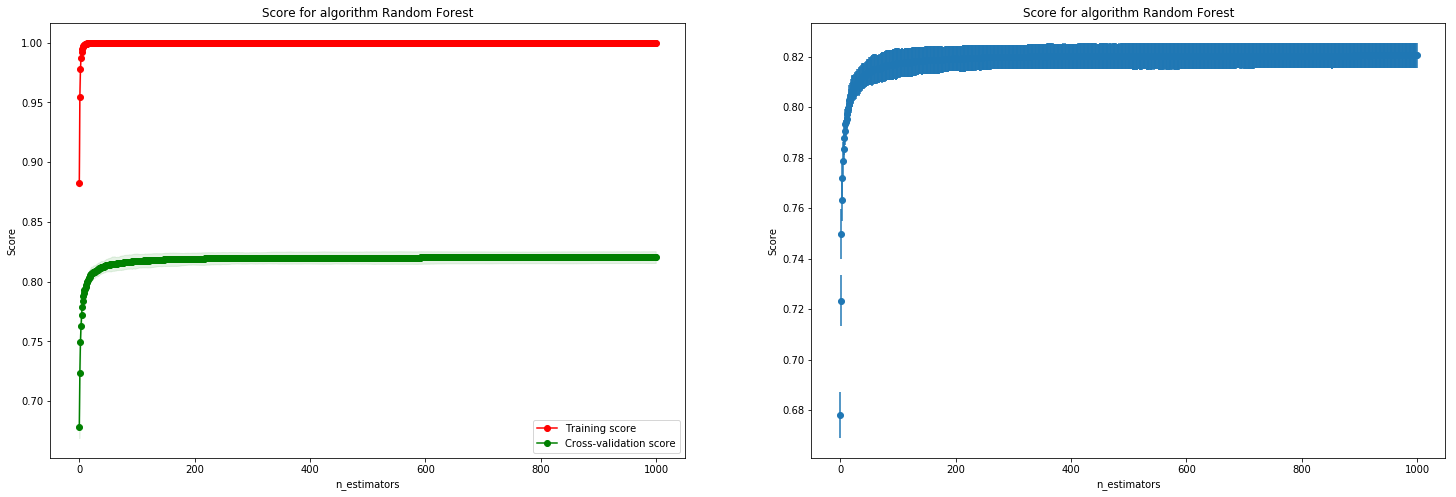

In [19]:
plots_scores(result_score, "Random Forest")
print("Лучший подбор параметра для Random Forest: {}".format(result_score['params'][np.argmax(result_score['mean_test_score'])]))
print("Лучший scope для Random Forest: {}".format(np.max(result_score['mean_test_score'])))
print("Макимальное отклонение для Random Forest: {}".format(max(result_score['std_test_score'])))

*В этом эксперименте получилось, что лучше всего справились алгоритмы деревьев и лес. Но как ни странно, именно дерево даёт самое высокое средние по ROC AUC - 0.8416. Самыми слабыми классификаторами на данный момент являются KNN и SGD Linear Classifier их качетсво меньше 0.65. У SGD Linear Classifier самый большой доверительный интервал.*

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**(1 балл) Задание 4.** Посмотрите на значения признаков *age*, *fnlwgt*, *capital-gain*. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Text(0.5,1,'capital-gain')

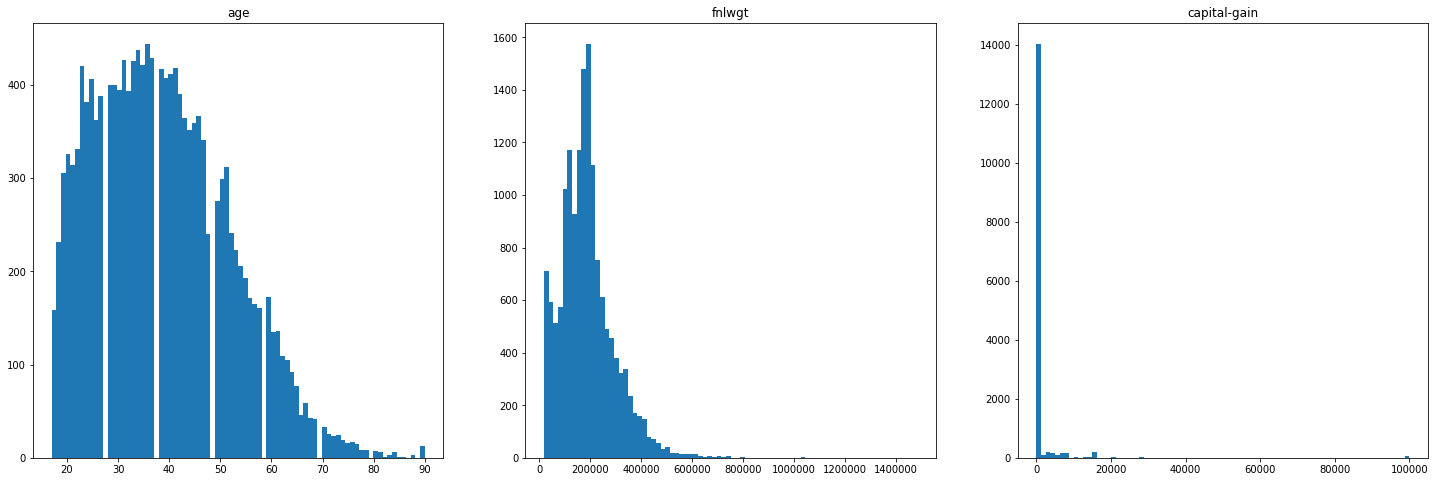

In [20]:
fig = plt.figure(figsize=(25,8))
(ax1, ax2, ax3) = fig.subplots(1, 3)

ax1.hist(X_df_numerical['age'], bins=80)
ax1.set_title('age')
ax2.hist(X_df_numerical['fnlwgt'], bins=80)
ax2.set_title('fnlwgt')
ax3.hist(X_df_numerical['capital-gain'], bins=80)
ax3.set_title('capital-gain')

*Данные получаются очень неоднородными. Возраст варьируется от 20 до 90, fnlwgt - примерно от 0 до 140000, capital-gain - от 0 до 100000, причем большинство значений лежат в самом начале интервала. Эти моменты оказывают существенное влияние на работу метрических классификатор, в частности на KNN. Для линейных классификаторов тоже необходимо масштабирование, так как признак с большим разбросом будет оказывать большее влияние при подсчете расстояния*

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл) Задание 5.** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество некоторых алгоритмов и почему?

In [21]:
X_df_numerical_norm = (X_df_numerical - X_df_numerical.mean()) / X_df_numerical.std()

### KNN с нормализованными данными

Лучший подбор параметра для KNN: {'n_neighbors': 30}
Лучший scope для KNN: 0.8328453665564268


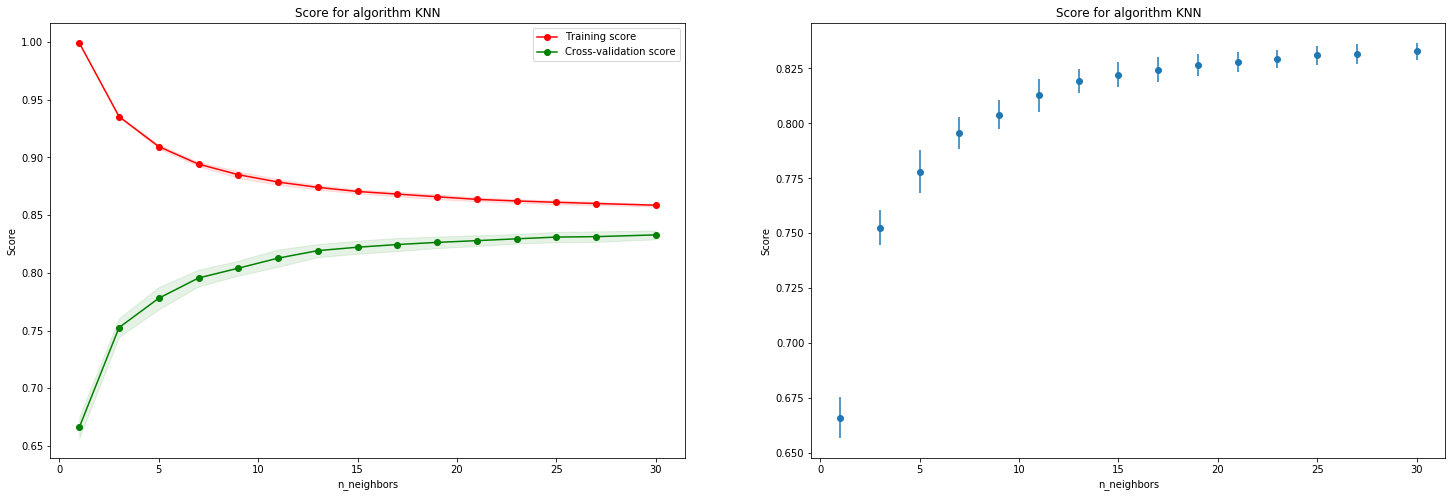

In [22]:
parameters = {'n_neighbors': np.linspace(1, 30, 15, dtype=np.int64)}
clf = model_select.GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "KNN")
print("Лучший подбор параметра для KNN: {}".format(clf.best_params_))
print("Лучший scope для KNN: {}".format(clf.best_score_))

### DTree с нормализованными данными

Лучший подбор параметра для DTree: {'max_depth': 7}
Лучший scope для DTree: 0.8416139709767461


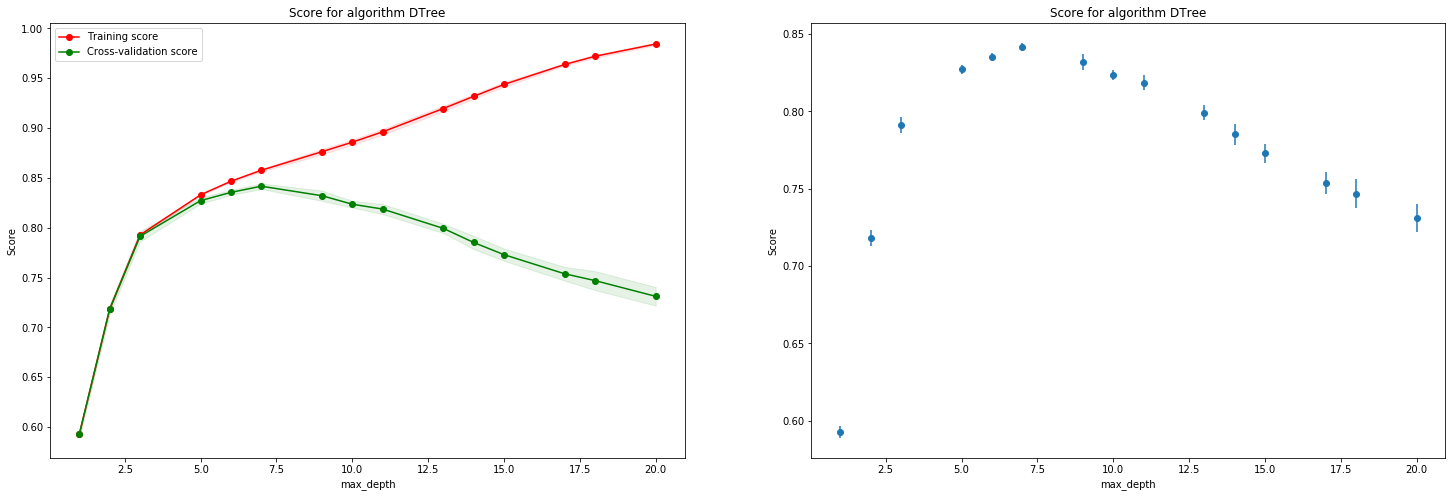

In [23]:
parameters = {'max_depth': np.linspace(1, 20, 15, dtype=np.int64)}
clf = model_select.GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "DTree")
print("Лучший подбор параметра для DTree: {}".format(clf.best_params_))
print("Лучший scope для DTree: {}".format(clf.best_score_))

### SGD Linear Classifier

Лучший подбор параметра для SGD Linear Classifier: {'loss': 'log'}
Лучший scope для SGD Linear Classifier: 0.8035141932078318


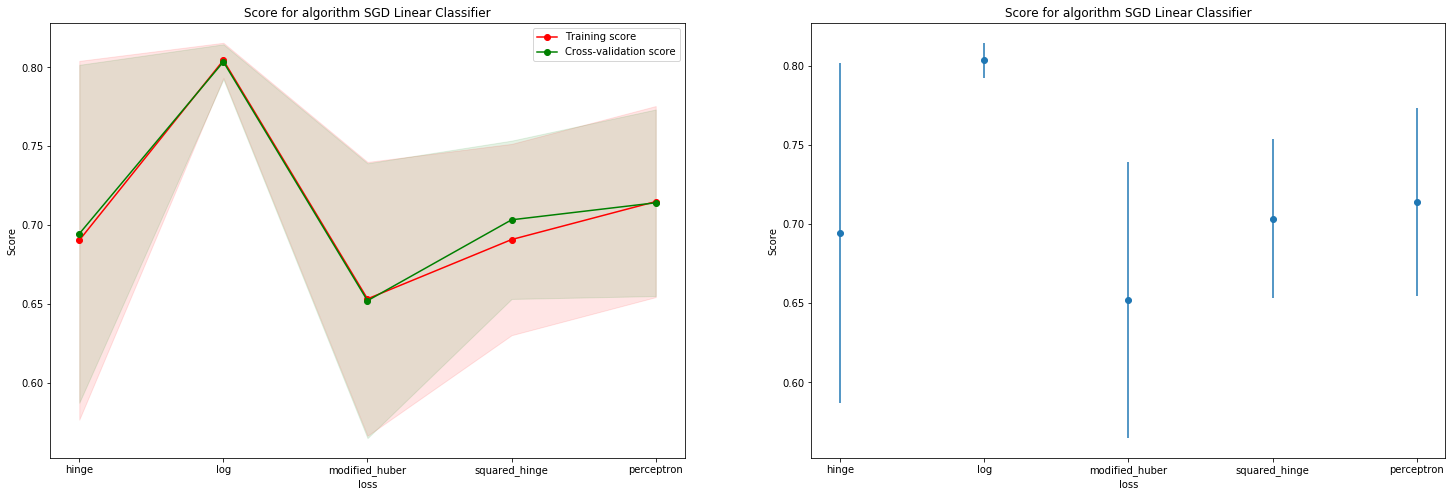

In [24]:
parameters = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
clf = model_select.GridSearchCV(SGDClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "SGD Linear Classifier")
print("Лучший подбор параметра для SGD Linear Classifier: {}".format(clf.best_params_))
print("Лучший scope для SGD Linear Classifier: {}".format(clf.best_score_))

### Random Forest

Лучший подбор параметра для Random Forest: {'n_estimators': 993}
Лучший scope для Random Forest: 0.8204597478605246


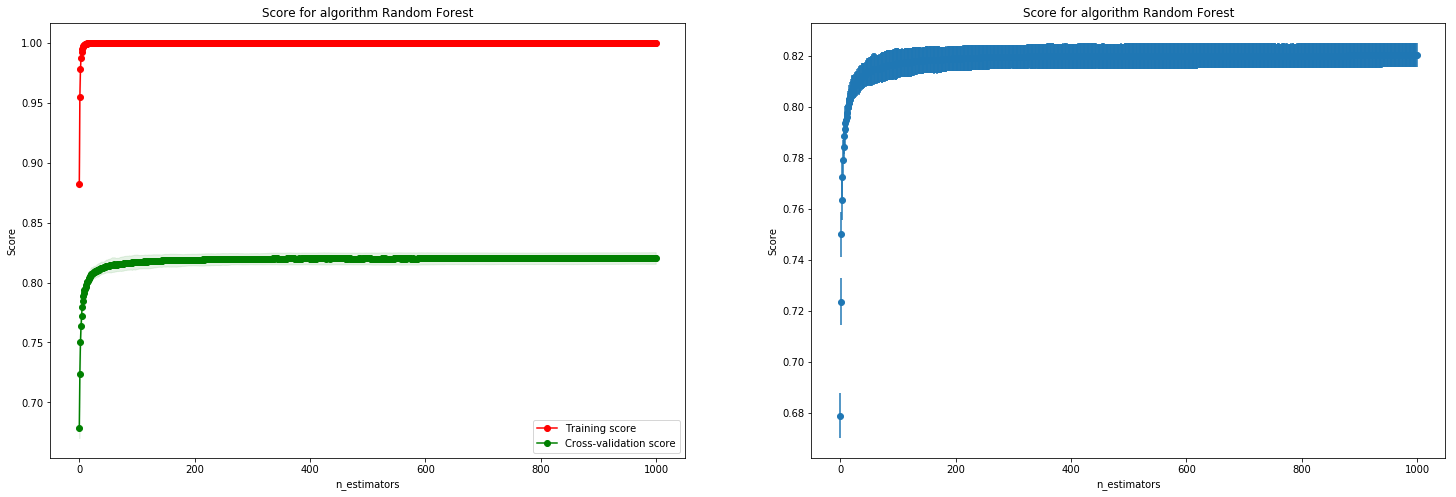

In [25]:
X = X_df_numerical_norm.values
y = y_df.values
MAX_ESTIMATION = 1000
clf = RandomForestClassifier(n_estimators=MAX_ESTIMATION, random_state=42)
kf = model_select.KFold(n_splits=5, random_state=32, shuffle=False)

training_scope = []
testing_scope = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    training_scope.append(ScopeForest(clf, X_train, y_train))
    testing_scope.append(ScopeForest(clf, X_test, y_test))
    
result_score = {}
result_score['params'] = [{'n_estimators': i} for i in range(MAX_ESTIMATION)]
result_score['mean_train_score'] = np.mean(training_scope, axis=0)
result_score['std_train_score'] = np.std(training_scope, axis=0)
result_score['mean_test_score'] = np.mean(testing_scope, axis=0)
result_score['std_test_score'] = np.std(testing_scope, axis=0)

plots_scores(result_score, "Random Forest")

print("Лучший подбор параметра для Random Forest: {}".format(result_score['params'][np.argmax(result_score['mean_test_score'])]))
print("Лучший scope для Random Forest: {}".format(np.max(result_score['mean_test_score'])))

*Как и ожидалось, после нормировки, методы подверженные метрическим расчетам KNN и SGD Linear значительно улучшили свое качество предсказывания, а у DecisionTree и RandomForest качество оценки почти не изменилось, поскольку эти алгоритмы устойчивы ко всевозможным разбросам между признаками.*

**(1.5 балла) Задание 6.** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели".

Какой из алгоритмов имеет наилучшее качество? 

### KNN с перебором нескольких параметров

In [27]:
parameters = {
    'n_neighbors': np.linspace(10, 40, 10, dtype=np.int64),
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

clf = model_select.GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='roc_auc')

clf.fit(X_df_numerical_norm, y_df)
print("Лучший подбор параметра для KNN: {}".format(clf.best_params_))
print("Лучший scope для KNN: {}".format(clf.best_score_))

Лучший подбор параметра для KNN: {'metric': 'manhattan', 'n_neighbors': 40}
Лучший scope для KNN: 0.8341131964163957


### DTree с перебором нескольких параметров

In [28]:
parameters = {
    'max_depth': np.linspace(3, 11, 7, dtype=np.int64),
    'criterion': ['gini', 'entropy']
}
clf = model_select.GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
print("Лучший подбор параметра для DTree: {}".format(clf.best_params_))
print("Лучший scope для DTree: {}".format(clf.best_score_))

Лучший подбор параметра для DTree: {'criterion': 'entropy', 'max_depth': 8}
Лучший scope для DTree: 0.8435394048879614


### SGD Linear Classifier

In [29]:
parameters = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet']
}
clf = model_select.GridSearchCV(SGDClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
print("Лучший подбор параметра для SGD Linear Classifier: {}".format(clf.best_params_))
print("Лучший scope для SGD Linear Classifier: {}".format(clf.best_score_))

Лучший подбор параметра для SGD Linear Classifier: {'loss': 'log', 'penalty': 'l1'}
Лучший scope для SGD Linear Classifier: 0.8119001412495599


### Random Forest

In [30]:
parameters = {
    'max_features': [None, 'log2', 'sqrt'],
    'criterion': ['gini', 'entropy']
}
clf = model_select.GridSearchCV(RandomForestClassifier(n_estimators=993), parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
print("Лучший подбор параметра для Random Forest: {}".format(clf.best_params_))
print("Лучший scope для Random Forest: {}".format(clf.best_score_))

Лучший подбор параметра для Random Forest: {'criterion': 'entropy', 'max_features': None}
Лучший scope для Random Forest: 0.8229946364368851


*Все алгориты имееют высокую точность предсказания. Но сильннее всех в этом эксперименте оказались **Деревья решения** с качеством 0.84.*

**(1.5 балла) Задание 7.** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = model_select.learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\kpetrov\\AppData\\Local\\Continuum\\miniconda3\\envs\\machine_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

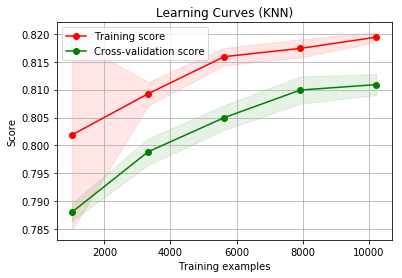

In [32]:
clf = KNeighborsClassifier(metric='manhattan', n_neighbors=40)
plot_learning_curve(clf, "Learning Curves (KNN)", X_df_numerical_norm, y_df)

<module 'matplotlib.pyplot' from 'C:\\Users\\kpetrov\\AppData\\Local\\Continuum\\miniconda3\\envs\\machine_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

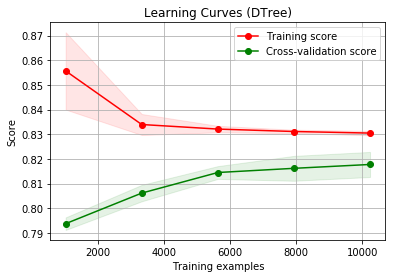

In [33]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8)
plot_learning_curve(clf, "Learning Curves (DTree)", X_df_numerical_norm, y_df)

<module 'matplotlib.pyplot' from 'C:\\Users\\kpetrov\\AppData\\Local\\Continuum\\miniconda3\\envs\\machine_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

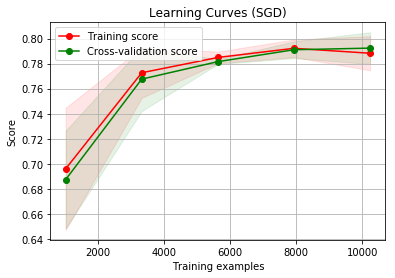

In [34]:
clf = SGDClassifier(loss='log', penalty='elasticnet')
plot_learning_curve(clf, "Learning Curves (SGD)", X_df_numerical_norm, y_df)

<module 'matplotlib.pyplot' from 'C:\\Users\\kpetrov\\AppData\\Local\\Continuum\\miniconda3\\envs\\machine_learning\\lib\\site-packages\\matplotlib\\pyplot.py'>

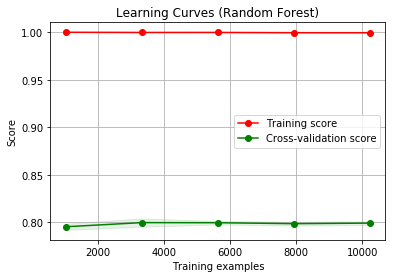

In [35]:
clf = RandomForestClassifier(n_estimators=993, criterion='entropy', max_features=None)
plot_learning_curve(clf, "Learning Curves (Random Forest)", X_df_numerical_norm, y_df)

** - Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?**

*Качество на обучающей выборке может и в основном убывает с ростом числа объектов, так если количество объектов невелико, модель проще построить которая будет угадывать тренирочные обьекты.*

*Качество на тестовой выборке также может уменьшаться с ростом числа объектов. Это может происходить, например из-за переобучения. Также, это может происходить из-за неравномерного распределения объектов, в результате которого с ростом числа объектов добавляютя объекты с признаками, на которых классификатор чаще ошибается.*

** - Для каких целей можно использовать знание качества на обучающей части выборки?**

*Знание качества на обучающей выборке можно использовать, для того чтобы определить, не переобучился ли алгоритм*

** - Какой из алгоритмов лучше обучается на меньшем числе объектов?**

*В моем случае, на меньшем числе объектов лучше обучается **SGDClassifier** и **Random Forest**. Для **SGDClassifier** по графику видно, что с ростом числа объектов у него даже увеличивается доверительный интервал. **Random Forest** возможно просто повезло, создается впечателение, что от роста числа выборки, качество его не уменьшается.*

** - Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение? **

*По графикам видно, что для всех алгоримах, кроме **Random Forest** есть куда расти при росте обучающей выборки. Вероятно, качество повысится не так значительно, но ожидать повышения однозначно можно.
*

### (2 балла) Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла) Задание 8.** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

In [36]:
X_df_categoracal.head()

,workclass,education,marital-status,occupation,relationship,race,sex
0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male
1,Private,Some-college,Divorced,Sales,Not-in-family,White,Male
2,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Own-child,White,Male
3,Private,Some-college,Never-married,Sales,Own-child,White,Female
4,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male


In [37]:
X_df_categoracal = pd.get_dummies(X_df_categoracal, dtype='float')
X_df_full = pd.concat([X_df_numerical_norm, X_df_categoracal], axis=1)
X_df_full.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,-0.342907,0.900229,-0.450773,-0.065597,-0.218733,1.588171,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.114756,0.010682,-0.059084,-0.150434,-0.218733,-0.074176,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.190353,-0.106277,1.115984,-0.150434,-0.218733,-0.074176,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-1.258235,-0.041381,-0.059084,-0.150434,-0.218733,-0.905349,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.648697,-0.371185,1.115984,1.995326,-0.218733,-0.074176,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем подбирать заново оптимальные гиперпараметры для моделей с учетом новых признаков (хотя правильнее было бы это сделать). 

**(1.5 балла) Задание 9.** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

In [38]:
clf_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=40)
scope_knn = model_select.cross_val_score(clf_knn, X_df_full, y_df, cv=5, scoring='roc_auc')
scope_knn.mean()

0.8895209951882224

In [39]:
clf_dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8)
scope_dtree = model_select.cross_val_score(clf_dtree, X_df_full, y_df, cv=5, scoring='roc_auc')
scope_dtree.mean()

0.8895661794320784

In [ ]:
clf_sgd = SGDClassifier(loss='log', penalty='elasticnet')
scope_sgd = model_select.cross_val_score(clf_sgd, X_df_full, y_df, cv=5, scoring='roc_auc')
scope_sgd.mean()

0.8925183441151008

In [43]:
clf_rf = RandomForestClassifier(n_estimators=993, criterion='entropy', max_features=None)
scope_rf = model_select.cross_val_score(clf_rf, X_df_full, y_df, cv=5, scoring='roc_auc')
scope_rf.mean()

0.9038600042210085

*Качество заметно выросло во **всех** алгоритмах. В значительный отрыв вышли Случайные леса. Их качество увеличилось с ~0.822 до ~0.904!*

### (3 балла) Смешивание моделей (blending)

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(2 балла) Задание 10.**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [48]:
class BlendingClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, clf1, clf2, alpha=0.5):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
    
    def fit(self, X, y):
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        return self
    
    def predict(self, X):
        clf1_predict = self.clf1.predict(X)
        clf2_predict = self.clf2.predict(X)
        return clf1_predict*self.alpha + clf2_predict*(1 - self.alpha)
    
    def predict_proba(self, X):
        clf1_predict_proba = self.clf1.predict_proba(X)
        clf2_predict_proba = self.clf2.predict_proba(X)
        return clf1_predict_proba*self.alpha + clf2_predict_proba*(1 - self.alpha)

**(1 балл) Задание 11.** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

### KNN + DTree

Лучший подбор параметра для BlendingClassifier: {'alpha': 0.6428571428571428}
Лучший scope для BlendingClassifier: 0.8494501016553654


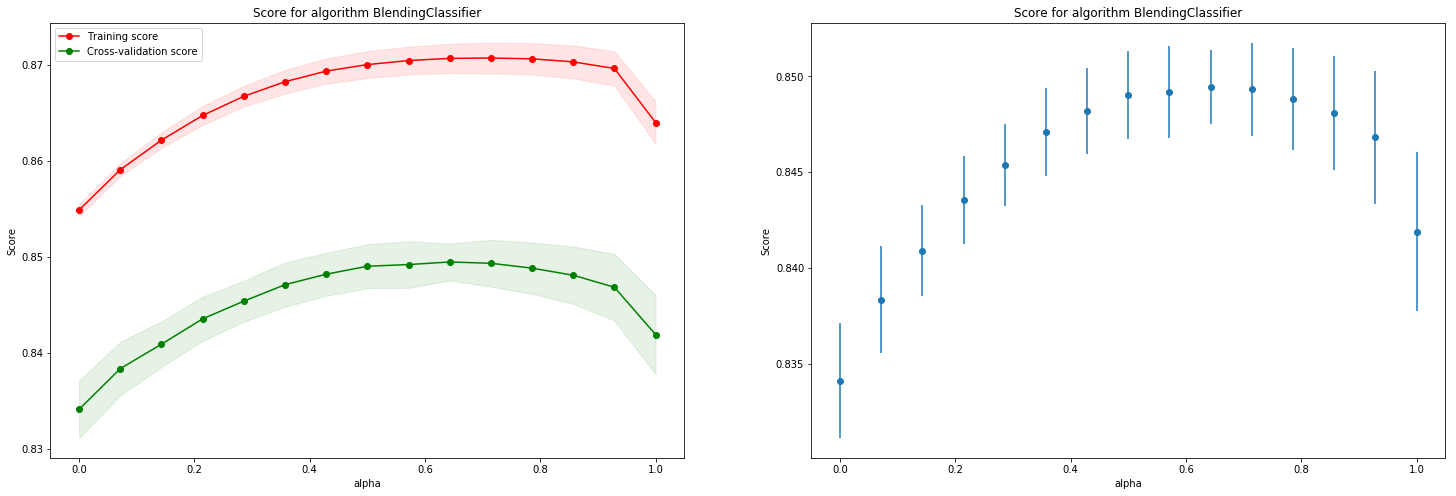

In [46]:
parameters = {'alpha': np.linspace(0, 1, 15)}

clf = model_select.GridSearchCV(BlendingClassifier(clf1=clf_dtree, clf2=clf_knn),
                                parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "BlendingClassifier")
print("Лучший подбор параметра для BlendingClassifier: {}".format(clf.best_params_))
print("Лучший scope для BlendingClassifier: {}".format(clf.best_score_))

### KNN + SGD

Лучший подбор параметра для BlendingClassifier: {'alpha': 0.21428571428571427}
Лучший scope для BlendingClassifier: 0.83701653424007


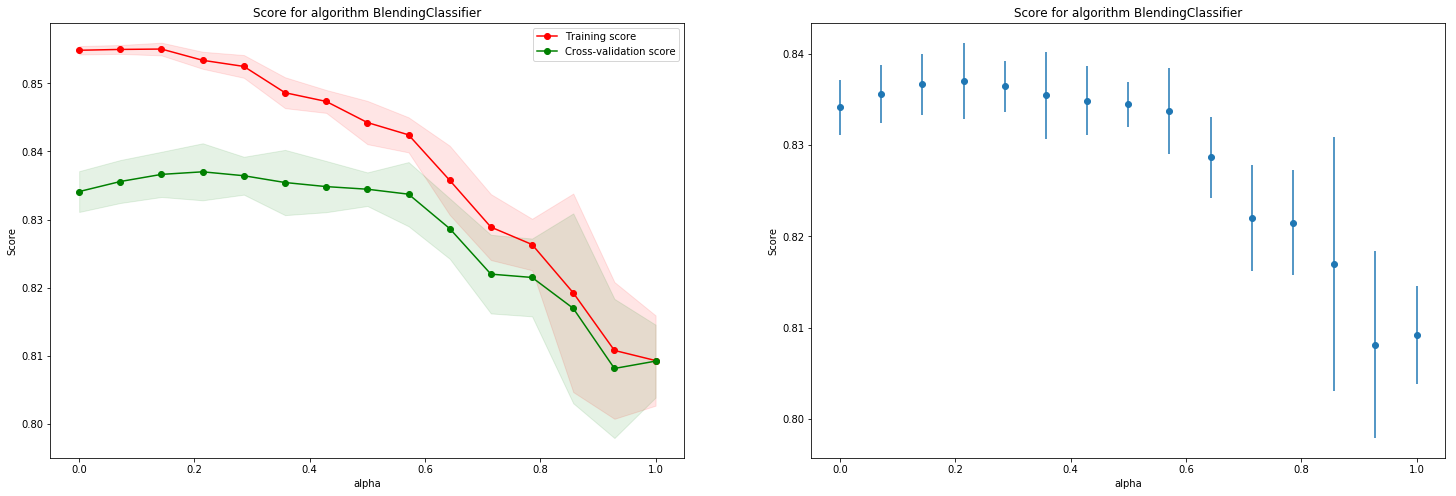

In [47]:
parameters = {'alpha': np.linspace(0, 1, 15)}

clf = model_select.GridSearchCV(BlendingClassifier(clf1=clf_sgd, clf2=clf_knn),
                                parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "BlendingClassifier")
print("Лучший подбор параметра для BlendingClassifier: {}".format(clf.best_params_))
print("Лучший scope для BlendingClassifier: {}".format(clf.best_score_))

### DTree + SGD

Лучший подбор параметра для BlendingClassifier: {'alpha': 0.7142857142857142}
Лучший scope для BlendingClassifier: 0.8476802288229421


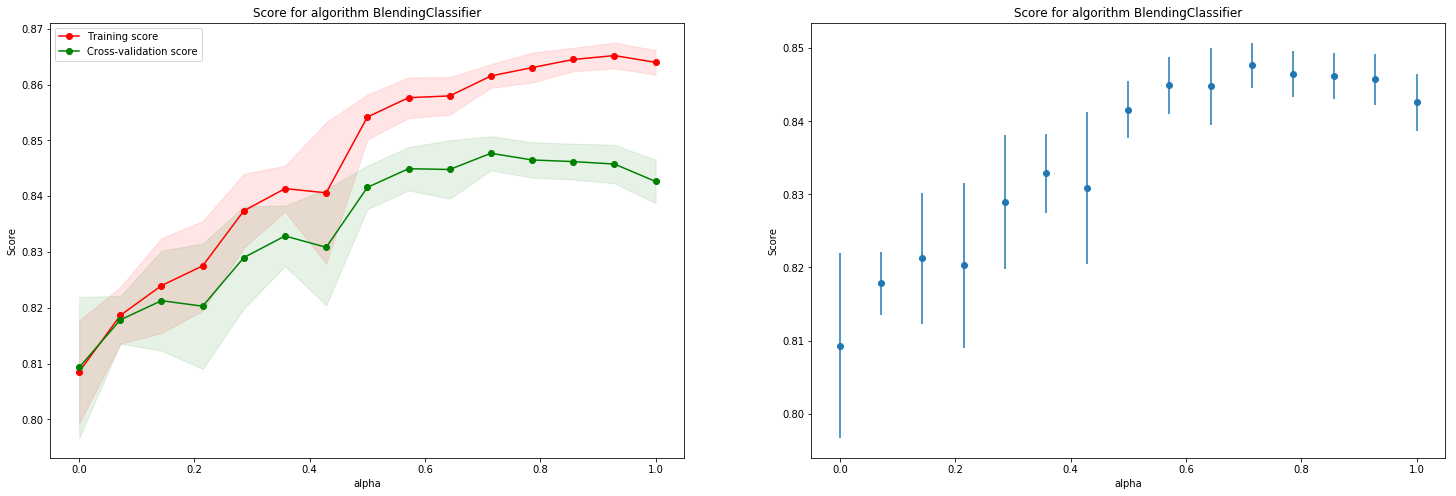

In [45]:
parameters = {'alpha': np.linspace(0, 1, 15)}

clf = model_select.GridSearchCV(BlendingClassifier(clf1=clf_dtree, clf2=clf_sgd),
                                parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "BlendingClassifier")
print("Лучший подбор параметра для BlendingClassifier: {}".format(clf.best_params_))
print("Лучший scope для BlendingClassifier: {}".format(clf.best_score_))

### Random Forest + SGD

Лучший подбор параметра для BlendingClassifier: {'alpha': 0.6428571428571428}
Лучший scope для BlendingClassifier: 0.8320763194418227


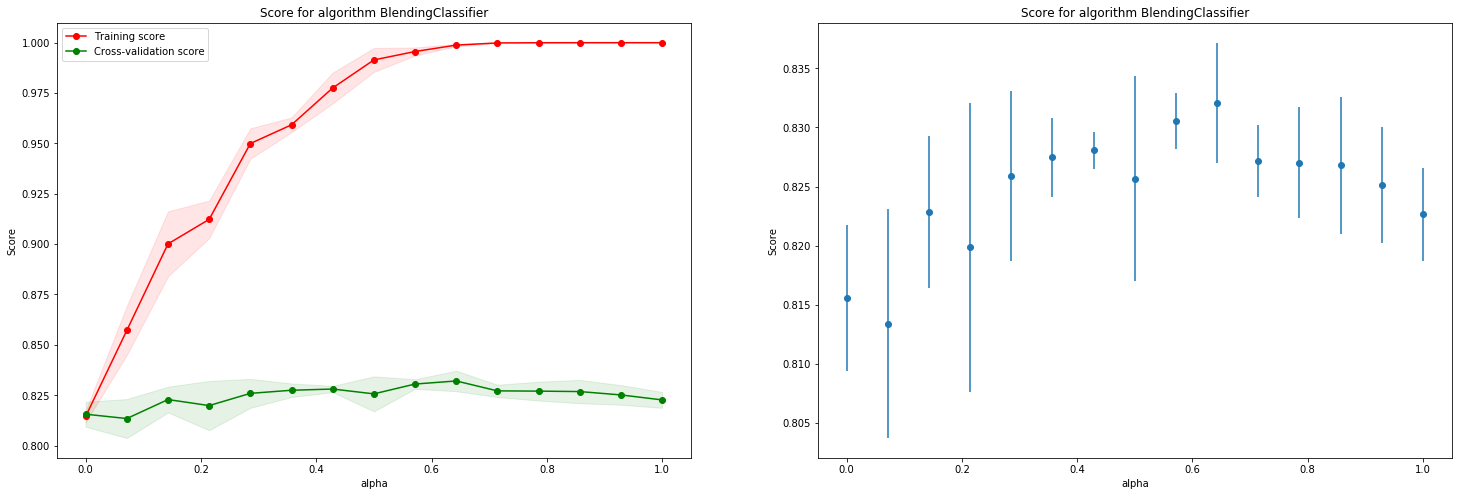

In [260]:
parameters = {'alpha': np.linspace(0, 1, 15)}

clf = model_select.GridSearchCV(BlendingClassifier(clf1=clf_rf, clf2=clf_sgd),
                                parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "BlendingClassifier")
print("Лучший подбор параметра для BlendingClassifier: {}".format(clf.best_params_))
print("Лучший scope для BlendingClassifier: {}".format(clf.best_score_))

### DTree + Random Forest

Лучший подбор параметра для BlendingClassifier: {'alpha': 0.21428571428571427}
Лучший scope для BlendingClassifier: 0.8469217156750366


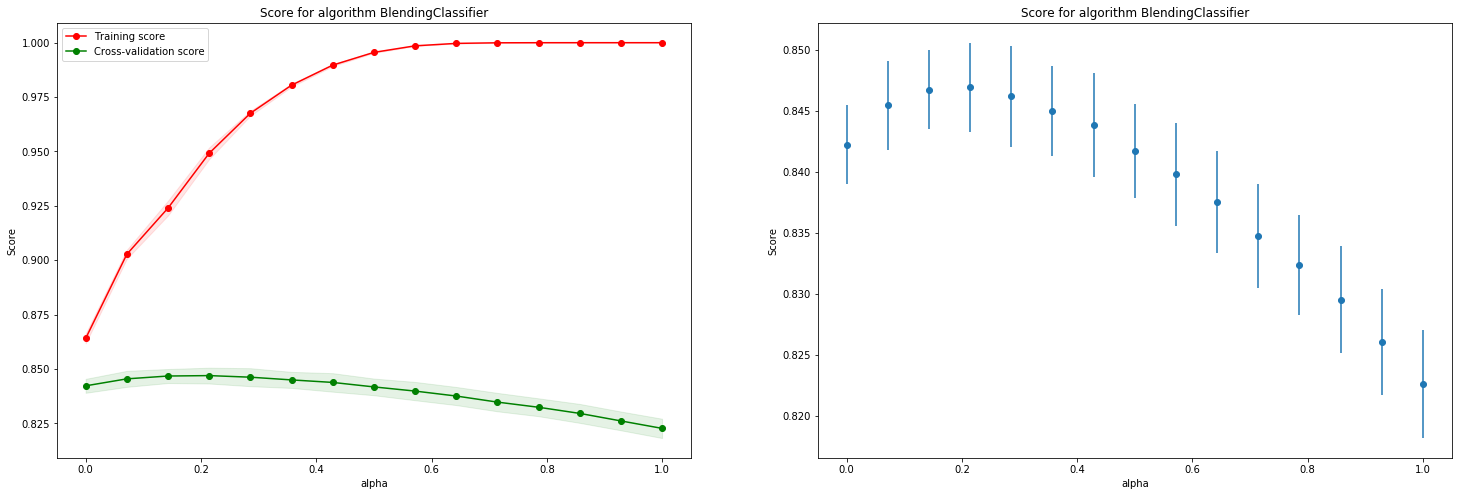

In [261]:
parameters = {'alpha': np.linspace(0, 1, 15)}

clf = model_select.GridSearchCV(BlendingClassifier(clf1=clf_rf, clf2=clf_dtree),
                                parameters, cv=5, scoring='roc_auc')
clf.fit(X_df_numerical_norm, y_df)
plots_scores(clf.cv_results_, "BlendingClassifier")
print("Лучший подбор параметра для BlendingClassifier: {}".format(clf.best_params_))
print("Лучший scope для BlendingClassifier: {}".format(clf.best_score_))

*Попробывал сделать блендинг моделей **KNN** + **DTree**; **KNN** + **SGD**; **DTree** + **SGD**; **Random Forest** + **SGD** и **Random Forest** + **DTree**. К сожалению ни одна комбинация моделей не дала лучше резульат, чем в отдельности. Это можно обьяснить тем, что по отдельности каждая из модель достаточно хорошо обучилась и поправки к ней особо не требуется.*

## (2 балла) Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей правильным продолжением является сравнение их между собой. На семинаре по визуализации вам было показано как строить "ящик с усами" (диаграмму размаха). Воспользуемся ей для сравнения алгоритмов между собой. 

**(2 балла) Задание 12.** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели, выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

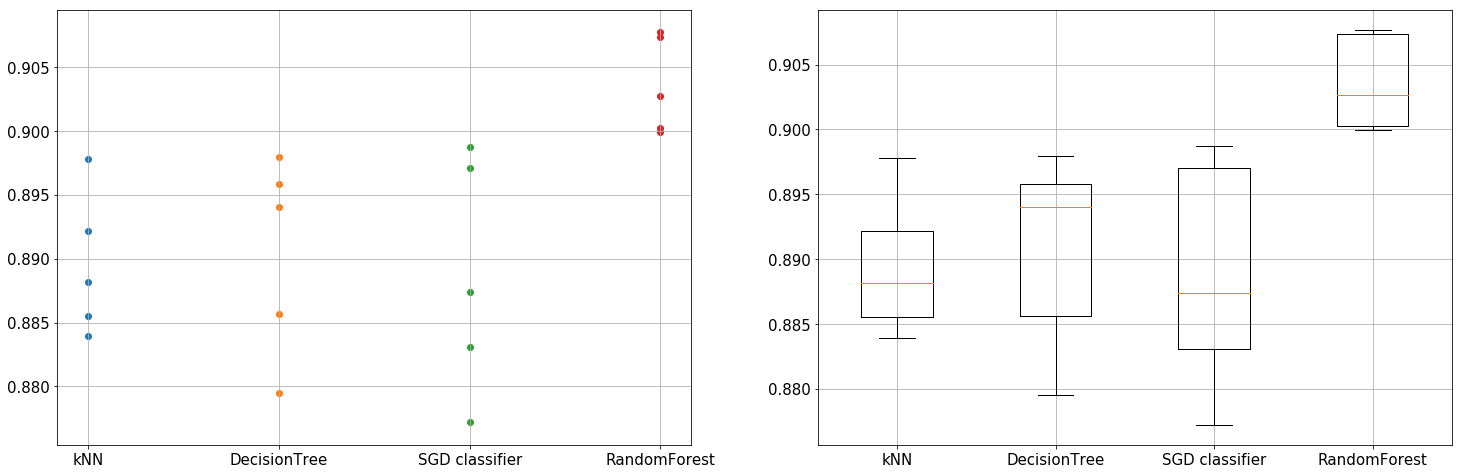

In [242]:
def show_scores(model_names, cv_scores):
    fig = plt.figure(figsize=(25,8))
    axs = fig.subplots(1, 2)
    for ax in axs:
        ax.set_xticks(np.arange(len(model_names)))
        ax.set_xticklabels(model_names)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=15)
    for i, (model_name, model_scores) in enumerate(zip(model_names, cv_scores)):
        axs[0].scatter(len(model_scores)*[i], model_scores)
    _ = axs[1].boxplot([model_scores for model_scores in cv_scores])
    axs[1].set_xticklabels(model_names)
    axs[1].tick_params(axis='both', which='major', labelsize=15)

    
model_names = [
    'kNN',
    'DecisionTree',
    'SGD classifier',
    'RandomForest'
]

cv_scores = [
    scope_knn,
    scope_dtree,
    scope_sgd,
    scope_rf
]

show_scores(model_names, cv_scores)

*В целом видно из выше диаграмм, что сильно хорошо получсился классификация с помощью **Random Forest**, все значения качества тренировочных выборках из **K-Folder** намного выше остальных классификаций, также он очень хорошо оказался устойчивым к размеру тренировочной выборки. Но он строился на очень большом количестве деревьев, что занимало приличное время тренировки, наверное это его единственный минус в этих экспериментах. С самым большим довирительным интервалом получился классификатор **SGD** но в среднемм он показывает не самое лучшее значение, это вызвано предположительно тем, что данные скорее всего не имеют хорошую линейную модель. **KNN** и **DTree** показывали на протяжении эксперимента неплохие результаты, однако ничего особенного в итоге из них не получилось.*